# Linear Autoregression; AR(p)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12,6)

## Linear deterministic trend

The process is given by

$$
Y_t = b + w_1t + \epsilon
$$

where $\epsilon$ is idd white noise. For the expectation and variance it holds that

$$
E(Y_t) = b + w_1t + E(\epsilon) = b+w_1t
$$

$$
V(Y_t) = \epsilon
$$

We can estimate $b$ and $w_1$ via linear regression. Forecasts can be produced by

$$
\hat{y}_{T+1} = \hat{b} + \hat{w}_1(T+1)
$$

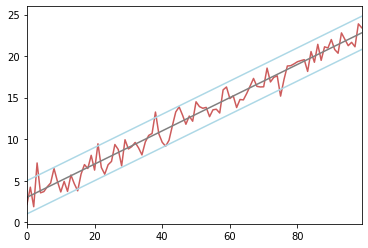

In [2]:
def make_linear(b, w1, T):
    epsilon = np.random.normal(size=T)
    return b + w1*pd.Series(range(T)) + epsilon

b = 3
w1 = 0.2
T = 100

trend = b + w1*pd.Series(range(T))
var = pd.Series([1]*T)

ax = make_linear(b, w1, T).plot(c='indianred')

ax.plot(trend + 2*var**0.5, c='lightblue')
ax.plot(trend - 2*var**0.5, c='lightblue')
ax.plot(trend, c='gray')
plt.show()

# Autoregressive processes

An autoregressive process - AR(p) - is a stochastic process of the form:

$$
y_t = b + \sum_{j=1}^{P}w_{j}y_{t-j} + \epsilon_t
$$

where $b$ is the bias, $w_j$ are the weights of the model and $\epsilon$ is some iid (e.g. Gaussian) noise. For the noise it holds that $E(\epsilon_t) = E(\epsilon) = 0$ and $V(\epsilon_t) = V(\epsilon) = \sigma^2$. E.g. expectation and variance are constant and time invariant.


For the case of $P=1$ we can write the process as:

$$
y_t = b + w_1y_{t-1} + \epsilon_t
$$

$$
y_{t-1} = b + w_1y_{t-2} + \epsilon_t
$$

$$
E(y_{t}) = b + w_1*E(y_{t-1}) + E(\epsilon_t)
$$

$$
E(y_{t}) - w_1*E(y_{t-1}) = b + E(\epsilon_t)
$$

$$
(1-w_1)*\mu = b + E(\epsilon_t)
$$

$$
\mu = \frac{b}{(1-w_1)}
$$

Lets model some $AR(1)$ processes!



In [3]:
def make_ar(b, w1, w2, T):
    epsilon = np.random.normal(size=T)
    y = np.zeros(T)
    for t in range(1, T):
        y[t] = b + w1*y[t-1] + w2*y[t-2] + epsilon[t]
    return pd.Series(y)

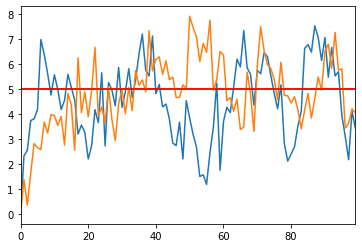

In [4]:
b = 1
w1 = 0.5
w2 = 0.3
mu = b/(1-w1-w2)
T = 100

fig, ax = plt.subplots(1)

for s in range(2):
    make_ar(b, w1, w2, T).plot(ax=ax)
    plt.plot(range(T), [mu]*T, c='r')

## Special case I: White noise

The process is given by 

$$
Y_t = \epsilon
$$

where $\epsilon$ is a idd (Gaussian) random variable. This is a special case of the $AR(1)$ model with $b=w_1=0$.

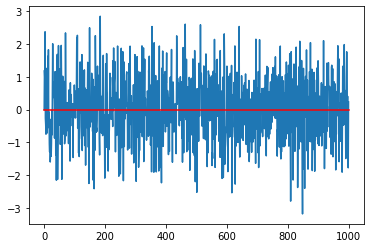

In [5]:
b = 0
w1 = 0
w2 = 0
mu = b/(1-w1-w2)
T = 1000

plt.plot(make_ar(b, w1, w2, T))
plt.plot(range(T), [0]*T, c='r')

## Special Case II: Random walk (with drift)

The process is given by 

$$
y_t = b + 1*y_{t-1} + \epsilon_t
$$

It is just another special case of the $AR(1)$ model with $w_1 = 1$.

For the expectation and variance it holds that

$$
E(Y_t) = b + E(Y_{t-1}) + E(\epsilon_t) = b + b + E(Y_{t-2}) + 0 = \dots = tb
$$

$$
V(Y_t) = V(Y_{t-1}) + \sigma^2 = V(Y_{t-2}) + \sigma^2 + \sigma^2 = \dots = t\sigma^2
$$

First differences yields:

$$
Y_t - Y_{t-1} = b + \epsilon_t
$$

So we can estimate b by taking the average over the first differences:

$$
\hat{y}_{T+1} = \hat{b} + Y_{T}
$$

where $\hat{b} = \frac{1}{T}\sum_{t=1}^{T} y_t - y_{t-1}$.

Allthough the random walk with drift looks quite similar to the linear trend model, these two models are completely different!

The random walk process is characterized by long periods of up or downward trends with sudden unpredictible changes. The naive forecast method corresponds to the best estimator we can get for a random walk withou drift. The drift method corresponds to the best estimator for a random walk with drift.



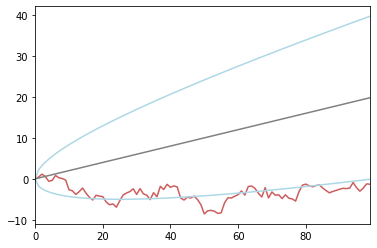

In [6]:
b = 0.2
w1 = 1
w2 = 0
T = 100

trend = pd.Series(np.arange(T)*b)
var = pd.Series(np.arange(T))

ax = make_ar(b, w1, w2, T).plot(c='indianred')

ax.plot(trend + 2*var**0.5, c='lightblue')
ax.plot(trend - 2*var**0.5, c='lightblue')
ax.plot(trend, c='grey')

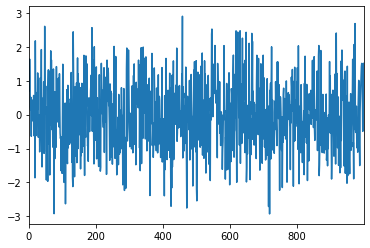

In [7]:
# Differencing a random walk returns a white noise process
make_ar(0, 1, 0, 1000).diff().plot()

## Special Case III: Explosive (exponential) process

This process is given by an AR(1) process for which $w_1 > 1$:

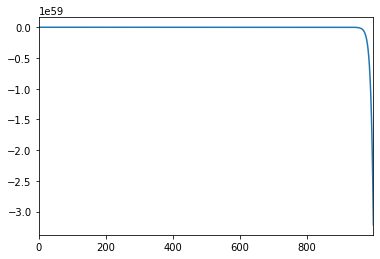

In [8]:
b = 0
w1 = 0.8
w2 = 0.4
mu = b/(1-w1)
T = 1000

make_ar(b, w1, w2, T).plot()

For AR and ARIMA models to work we need stationary and weakly dependent time series.

# Stationarity
 
Stationarity means that the properties of the series do not depend on the time at which the series is observed. In other words, a time series is stationary if the expectation and variance do not change over time. In the long run, a stationary time series is not predictible.

We can transform a non stationary time series into a stationary process by:

- taking first (or higher order) differences to stabilize the mean (difference stationary)
- transformations (e.g. log) can help to stabilize the variance
- removing trend and seasonality (trend stationary)

By checking the ACF (autocorrelation) function of the time series for suspicously high autocorrelation that dies out slowly we can test for stationarity:

# Weak Dependence

"A stationary time series process [...] is said to be weakly dependent if
$y_t$ and $y_{t-h}$ are "almost independent" as h" goes to infinity.
"In other words, as the variables get farther apart in time, the correlation
between them becomes smaller and smaller." - 
Introductory Econometrics - Wooldridge, J.

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Figure(432x288)


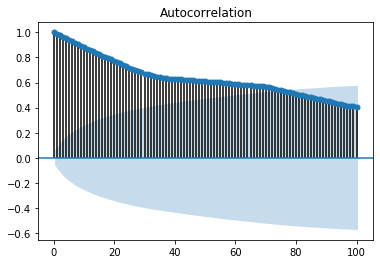

In [10]:
b = 0
w1 = 1
w2 = 0
#mu = b/(1-w1-w2)
T = 1000

y = make_ar(b, w1, w2, T)
print(plot_acf(y, lags=100))

$y_t = w_1 y_{t-1}$

$y_t = w_2 y_{t-2}$

## Order of the AR(p) process

$y_t = w_1*y_{t-1} + w_2*y_{t-2}$

How do we determine the order of the AR(p) process?

The Box-Jenkins Method suggests to look at the Partial Autocorrelation (PAC).

Figure(432x288)


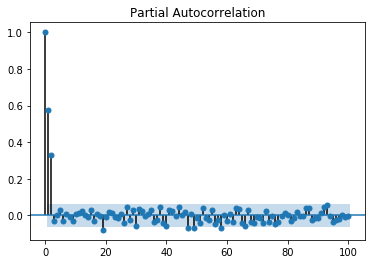

In [11]:
b = 0
w1 = 0.4
w2 = 0.3
mu = b/(1-w1-w2)
T = 1000

y = make_ar(b, w1, w2, T)
print(plot_pacf(y, lags=100))

## Split y into train and test

In [12]:
len(y)

1000

In [13]:
y_train = y[:800]
y_test = y[800:]

## How do we fit the model?

In [20]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import TimeSeriesSplit

In [21]:
tscv = TimeSeriesSplit()
TimeSeriesSplit(n_splits=5)

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [22]:
split = tscv.split(y_train)

In [24]:
for train_index, test_index in split:
    m.fit(y_train[train_index])
    m.score(y_train[train_index], y_train[test_index])
    print('A new split')
    print(train_index)
    print(test_index)

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
m = AutoReg(y_train, lags=2)

In [25]:
res = m.fit()

In [26]:
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  800
Model:                     AutoReg(2)   Log Likelihood               -1139.197
Method:               Conditional MLE   S.D. of innovations              1.009
Date:                Tue, 28 Apr 2020   AIC                              0.027
Time:                        15:49:34   BIC                              0.051
Sample:                             2   HQIC                             0.036
                                  800                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0718      0.037     -1.965      0.049      -0.143      -0.000
y.L1           0.3814      0.033     11.443      0.000       0.316       0.447
y.L2           0.3360      0.033     10.080      0.0

## Compare that to a linear regression

In [65]:
from sklearn.linear_model import LinearRegression

m_lin = LinearRegression()

In [68]:
df = pd.DataFrame({'y_train': y_train})
df.head()

,y_train
0,0.000000
1,-1.395518
2,-1.229956
3,-1.757691
4,-2.753789


In [70]:
df['lag_1'] = df.y_train.shift()
df['lag_2'] = df.y_train.shift(2)
df.head()

,y_train,lag_1,lag_2
0,0.000000,NaN,NaN
1,-1.395518,0.000000,NaN
2,-1.229956,-1.395518,0.000000
3,-1.757691,-1.229956,-1.395518
4,-2.753789,-1.757691,-1.229956


In [71]:
X_train = df[['lag_1', 'lag_2']].iloc[2:800]
y_train_lin = y_train[2:]

In [72]:
m_lin.fit(X_train, y_train_lin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
m_lin.coef_

array([0.45506733, 0.24321782])

## Make predictions

In [ ]:
# In sample prediction
pred = res.predict()

In [77]:
# Out of sample forecasting
forecast = res.predict(start=len(y_train), end=len(y))

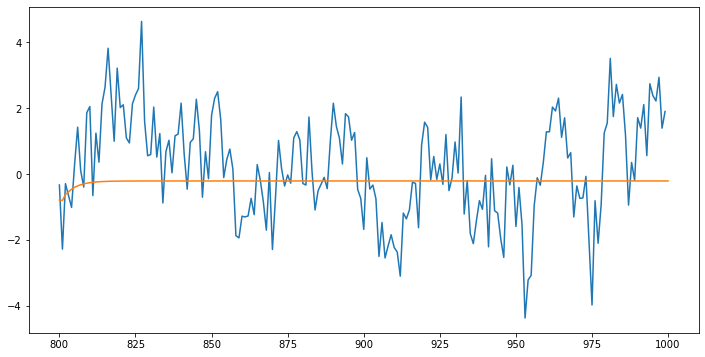

In [78]:
plt.plot(y_test)
plt.plot(forecast)

In [ ]:
# Plot

## Implement a walk-forward forecast

In [83]:
# Save parameters
parameters = res.params.values

In [85]:
y_for_pred = y_train

In [90]:
# Test on one-step ahead forecast
parameters[0] + y_for_pred.iloc[-1] * parameters[1] + y_for_pred.iloc[-2] * parameters[2]

-0.7891749739257624

In [91]:
res.predict(start=len(y_train), end=len(y_train))

800   -0.789175
dtype: float64

In [95]:
y_test.iloc[0:1]

800   -0.333333
dtype: float64

In [99]:
# create an empty list of predictions
predictions = []

# create a loop to predict the value for every timestep in y_test
for i in range(len(y_test)):
    predictions.append(parameters[0] + y_for_pred.iloc[-1] * parameters[1] + y_for_pred.iloc[-2] * parameters[2])
    y_for_pred = y_for_pred.append(y_test.iloc[i:i+1])

In [100]:
len(y_for_pred)

1000

In [101]:
predictions

[-0.7891749739257624,
 -0.5941129287467102,
 -1.1826774766688302,
 -0.7520994613326162,
 -0.4323403210049581,
 -0.6842548995943092,
 -0.17518889937736573,
 0.655846659961919,
 0.3280180083023465,
 -0.21932511139176983,
 0.6871773079013194,
 1.3214102937697612,
 0.1361023727458499,
 0.34184792668131786,
 0.40145986741540174,
 0.9900613970320331,
 1.6537164308667813,
 2.316108590535506,
 1.9527668557406077,
 0.9710391357018594,
 1.6424240526760518,
 1.6377700545270222,
 1.384068724215942,
 0.9470526777587445,
 0.6326777986445413,
 1.1361490396324079,
 1.546801380784758,
 1.7010066670783504,
 2.675978115686145,
 1.788944187714966,
 0.5760490788962874,
 0.3405292613703505,
 1.0061154790232372,
 0.6650211459629648,
 0.6206148399026763,
 -0.16512865145404537,
 0.03216576822041539,
 0.5684759441317049,
 0.20211749150456085,
 0.47357588495693603,
 0.7701275717767506,
 1.2102279007709182,
 0.7354286588241958,
 -0.12577066472682924,
 0.26025730966080607,
 0.6561887200411287,
 1.2299349939649211,

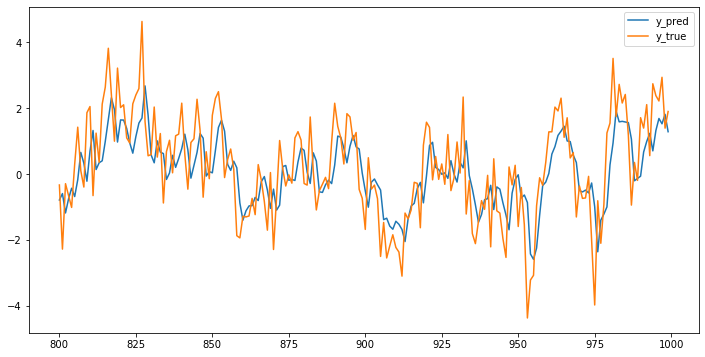

In [104]:
# Plot everything
plt.plot(y_test.index, predictions, label='y_pred')
plt.plot(y_test, label='y_true')
plt.legend()

In [105]:
# Evaluate your forecast
from sklearn.metrics import mean_squared_error

# Try that on the flights data

In [106]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
%matplotlib inline

df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [107]:
df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,year,month,passengers
date,,,
1949-01-01,1949,January,112
1949-02-01,1949,February,118
1949-03-01,1949,March,132
1949-04-01,1949,April,129
1949-05-01,1949,May,121


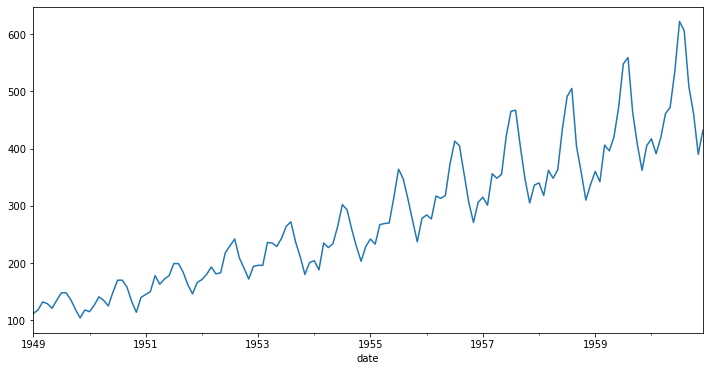

In [109]:
mpl.rcParams['figure.figsize'] = (12,6)

df['passengers'].plot()

In [110]:
# Split it into train and test
y_train_flights = df[:'1958'].passengers
y_test_flights = df['1959':].passengers

len(y_train_flights), len(y_test_flights)

(120, 24)

## Look at the plots

Figure(864x432)


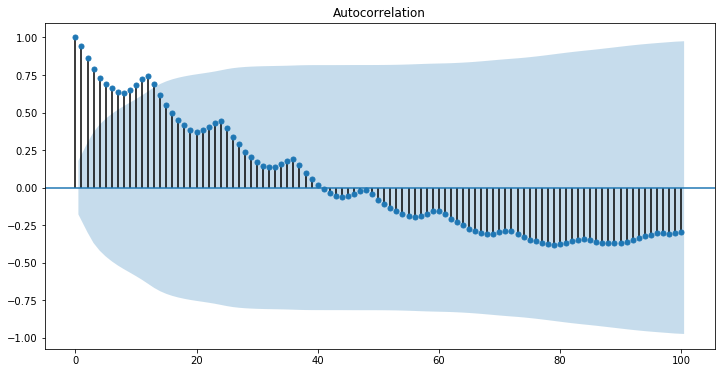

In [111]:
print(plot_acf(y_train_flights, lags=100))

Figure(864x432)


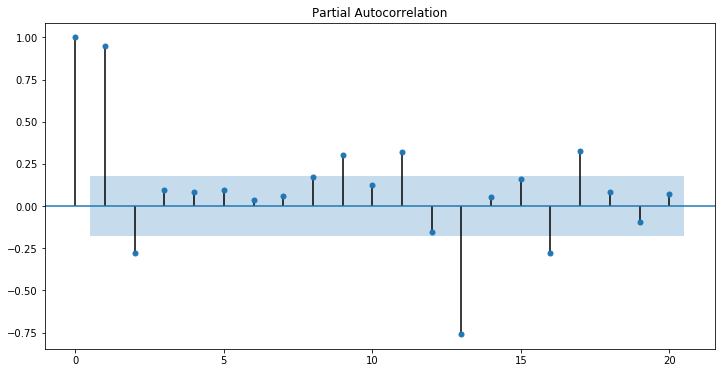

In [114]:
print(plot_pacf(y_train_flights, lags=20))

In [129]:
# Fit the model
ar_flights = AutoReg(y_train_flights, lags=2)
res_flights = ar_flights.fit()
print(res_flights.summary())

                            AutoReg Model Results                             
Dep. Variable:             passengers   No. Observations:                  120
Model:                     AutoReg(2)   Log Likelihood                -556.113
Method:               Conditional MLE   S.D. of innovations             26.947
Date:                Tue, 28 Apr 2020   AIC                              6.656
Time:                        15:29:08   BIC                              6.749
Sample:                    03-01-1949   HQIC                             6.694
                         - 12-01-1958                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        16.9137      6.982      2.423      0.015       3.230      30.598
passengers.L1     1.2493      0.088     14.229      0.000       1.077       1.421
passengers.L2    -0.3125      0.087     

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [126]:
parameters = res_flights.params

In [127]:
## construct walk-forward forecast

# create an empty list of predictions
predictions = []

# create a loop to predict the value for every timestep in y_test
for i in range(len(y_train_flights), len(df)):
    predictions.append(parameters[0] + sum(df.passengers[i-1:i].values * parameters[:0:-1].values))

In [27]:
# Plot the three plots
plt.plot(df.passengers, label='y')
plt.plot(res_flights.predict(), label='in_sample')
plt.plot(y_test_flights.index, predictions, label='out_of_sample')
plt.legend()

NameError: name 'df' is not defined

In [28]:
# Do a automatic decomposition
from statsmodels.tsa.seasonal import STL

decompose = STL(y_train_flights, seasonal=13)
decompose = decompose.fit()
print(decompose.plot())

NameError: name 'y_train_flights' is not defined

Figure(864x432)


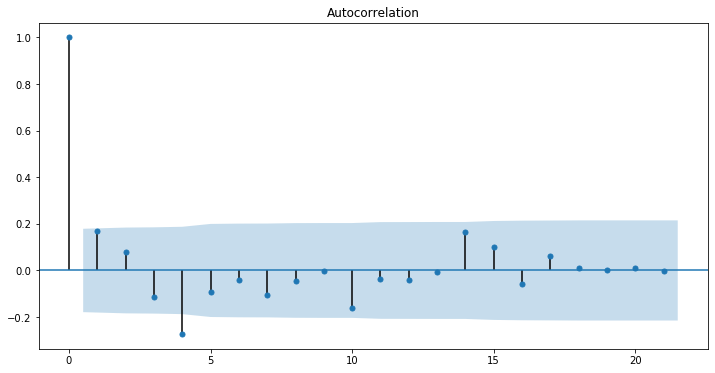

In [132]:
# Take the residuals for the analysis
series = decompose.resid
print(plot_acf(series))

Figure(864x432)


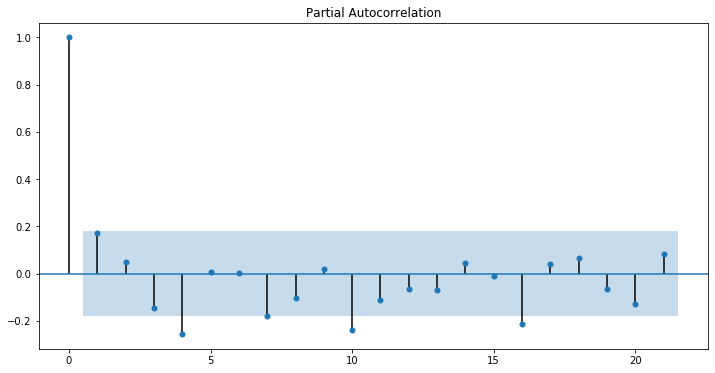

In [133]:
print(plot_pacf(series))

In [134]:
# Fit the model on the residuals
series_model = AutoReg(series, lags=2)
res_fl = series_model.fit()
print(res_fl.summary())

                            AutoReg Model Results                             
Dep. Variable:                  resid   No. Observations:                  120
Model:                     AutoReg(2)   Log Likelihood                -355.429
Method:               Conditional MLE   S.D. of innovations              4.919
Date:                Tue, 28 Apr 2020   AIC                              3.254
Time:                        15:34:16   BIC                              3.348
Sample:                    03-01-1949   HQIC                             3.292
                         - 12-01-1958                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0225      0.453      0.050      0.960      -0.865       0.910
resid.L1       0.1638      0.092      1.784      0.074      -0.016       0.344
resid.L2       0.0497      0.092      0.541      0.5

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [136]:
# reconstruct the values
pr = res_fl.fittedvalues + decompose.seasonal + decompose.trend

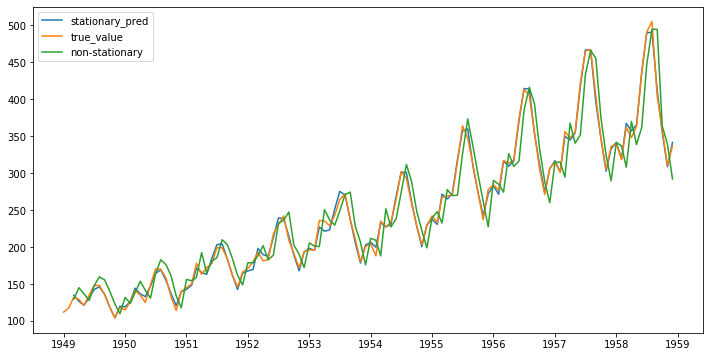

In [137]:
# Plot everything together
plt.plot(pr, label='stationary_pred')
plt.plot(y_train_flights, label='true_value')
plt.plot(res_flights.predict(), label='non-stationary')
plt.legend()

In [141]:
# Compare the mean_squared_error of the two approaches
print(f'Stationarized time sereis: {mean_squared_error(y_train_flights[4:], pr[4:])}')
print(f'Non-Stationarized time sereis: {mean_squared_error(y_train_flights[4:], res_flights.predict()[4:])}')

Stationarized time sereis: 24.496926468027823
Non-Stationarized time sereis: 736.4228255722538


## Black-box model?

Use prophet